In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()


# Importing Data from Excel

In [2]:
#Importing the Excel Sheet
NFL_Data = pd.read_excel('NFL Data.xlsx')
NFL_Data.head()

,Wins,Team,Season,Offensive Yards Per Play,Opponents Yards Per Play,1st Downs Per Game,1st Downs Per Play,3rd Down Conversion Rate,Opponent 3rd Down Conversion Rate,Opponent Completion Percentage,...,Scoring Margin,Opponent Plays Per Game,Opponent Yards Per Rush Attempt,Opponent Yards Per Pass Attempt,Sack Percentage,Time of Possession Percentage,Opponents First Downs Per Game,Interceptions Thrown Per Game,Opponent Passing TD Per Game,Passing TD Per Game
0,8,Arizona,2020,5.7,5.3,23.8,0.352,0.3960,0.3960,0.6404,...,2.7,65.9,4.6,6.4,0.0777,0.4807,22.7,0.8,1.6,1.7
1,4,Atlanta,2020,5.5,6.2,22.9,0.340,0.4389,0.4103,0.6800,...,-1.1,64.6,4.4,7.5,0.0443,0.5116,22.9,0.7,2.1,1.7
2,11,Baltimore,2020,5.8,5.1,20.4,0.326,0.4852,0.3380,0.6388,...,8.8,62.3,4.3,5.9,0.0599,0.5288,20.9,0.7,1.3,1.5
3,13,Buffalo,2020,6.0,5.6,24.2,0.378,0.4664,0.4170,0.6412,...,6.8,65.2,4.7,6.6,0.0583,0.5150,22.4,0.6,1.5,2.4
4,5,Carolina,2020,5.6,5.6,20.9,0.337,0.3897,0.4925,0.6803,...,-3.2,63.9,4.7,6.5,0.0472,0.5165,22.5,1.0,1.8,1.0


# Describing Data

In [3]:
NFL_Data.describe()

,Wins,Season,Offensive Yards Per Play,Opponents Yards Per Play,1st Downs Per Game,1st Downs Per Play,3rd Down Conversion Rate,Opponent 3rd Down Conversion Rate,Opponent Completion Percentage,Pass Yards Per Game,...,Scoring Margin,Opponent Plays Per Game,Opponent Yards Per Rush Attempt,Opponent Yards Per Pass Attempt,Sack Percentage,Time of Possession Percentage,Opponents First Downs Per Game,Interceptions Thrown Per Game,Opponent Passing TD Per Game,Passing TD Per Game
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.00000,352.000000
mean,7.974432,2015.000000,5.428693,5.450284,19.995455,0.312605,0.390220,0.391456,0.624891,234.240909,...,-0.234943,63.931250,4.234091,6.751705,0.062799,0.499514,20.063636,0.882386,1.56250,1.545739
std,3.111769,3.166779,0.472431,0.404814,2.275832,0.028041,0.048806,0.040542,0.036684,36.334660,...,6.012632,2.697438,0.411276,0.585822,0.012608,0.024379,1.805480,0.298003,0.34271,0.469872
min,0.000000,2010.000000,4.100000,4.500000,13.900000,0.232000,0.252200,0.256000,0.525000,136.200000,...,-13.400000,57.300000,3.000000,5.400000,0.026400,0.431000,15.400000,0.200000,0.60000,0.500000
25%,6.000000,2012.000000,5.100000,5.200000,18.500000,0.292000,0.359150,0.364300,0.598800,206.100000,...,-4.625000,62.075000,4.000000,6.300000,0.055000,0.483600,18.800000,0.700000,1.30000,1.200000
50%,8.000000,2015.000000,5.400000,5.400000,20.050000,0.312500,0.389650,0.389000,0.627650,233.700000,...,-0.350000,63.700000,4.200000,6.700000,0.062550,0.502050,20.100000,0.900000,1.60000,1.500000
75%,10.000000,2018.000000,5.800000,5.700000,21.525000,0.333000,0.425525,0.417125,0.647050,256.825000,...,4.225000,65.500000,4.500000,7.200000,0.070600,0.515750,21.200000,1.100000,1.80000,1.800000
max,15.000000,2020.000000,6.700000,6.600000,27.600000,0.385000,0.557900,0.519800,0.728800,346.700000,...,13.700000,71.800000,5.300000,8.400000,0.096400,0.573400,26.100000,1.900000,2.80000,3.300000


# Drop Unnecessary Columns

In [4]:
#Drop Columns that you dont need (Season)

NFL_New = NFL_Data.drop(['Season','Team '], axis = 1)
NFL_New.head()

,Wins,Offensive Yards Per Play,Opponents Yards Per Play,1st Downs Per Game,1st Downs Per Play,3rd Down Conversion Rate,Opponent 3rd Down Conversion Rate,Opponent Completion Percentage,Pass Yards Per Game,Rush Yards Per Game,...,Scoring Margin,Opponent Plays Per Game,Opponent Yards Per Rush Attempt,Opponent Yards Per Pass Attempt,Sack Percentage,Time of Possession Percentage,Opponents First Downs Per Game,Interceptions Thrown Per Game,Opponent Passing TD Per Game,Passing TD Per Game
0,8,5.7,5.3,23.8,0.352,0.3960,0.3960,0.6404,244.8,139.8,...,2.7,65.9,4.6,6.4,0.0777,0.4807,22.7,0.8,1.6,1.7
1,4,5.5,6.2,22.9,0.340,0.4389,0.4103,0.6800,272.7,95.8,...,-1.1,64.6,4.4,7.5,0.0443,0.5116,22.9,0.7,2.1,1.7
2,11,5.8,5.1,20.4,0.326,0.4852,0.3380,0.6388,171.9,192.1,...,8.8,62.3,4.3,5.9,0.0599,0.5288,20.9,0.7,1.3,1.5
3,13,6.0,5.6,24.2,0.378,0.4664,0.4170,0.6412,281.2,104.2,...,6.8,65.2,4.7,6.6,0.0583,0.5150,22.4,0.6,1.5,2.4
4,5,5.6,5.6,20.9,0.337,0.3897,0.4925,0.6803,243.0,106.5,...,-3.2,63.9,4.7,6.5,0.0472,0.5165,22.5,1.0,1.8,1.0


# Linear Regression Process

In [5]:
#Define the Independent and Dependent Variables

Y = NFL_New["Wins"]
X = NFL_New.drop(["Wins"],axis = 1)


# Scale the data

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [7]:
X_scaled = scaler.transform(X)


# Test Train Split

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y, test_size = 0.25, random_state = 365)

#  Create Regression

In [9]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [10]:
#The predictions of the linear model is always in Y_Hat

Y_Hat = LR.predict(x_train)

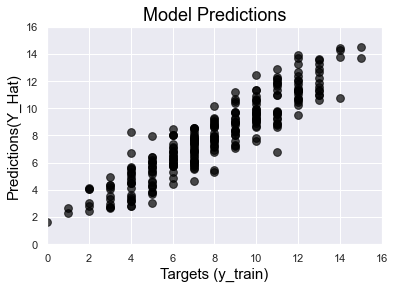

In [11]:
#Check a scatter plot to see if the predictions are correct.


#For Alpha in the top line of code
#The more saturated the color, the higher the concentration

plt.scatter(y_train,Y_Hat, alpha = 0.7, c='black', s =60)
plt.xlabel('Targets (y_train)', size = 15, c = 'Black')
plt.ylabel('Predictions(Y_Hat)', size = 15, c = 'Black')
plt.xlim(0,16)
plt.ylim(0,16)
plt.title('Model Predictions', size=18, c='Black')
plt.show()




/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

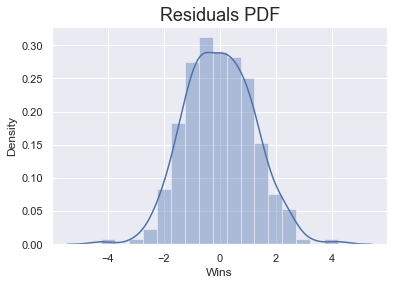

In [12]:
#Check using a residual plot

sns.distplot(y_train - Y_Hat)
plt.title('Residuals PDF', size = 18)


# R Squared

In [13]:
#The model explains 84.5% of the variability of the data 

LR.score(x_train,y_train)

0.8462561366888671

# Adjusted R Squared

In [14]:
# Let's use the handy function we created
def adjusted_R(x,y):
    r2 = LR.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [15]:
adjusted_R(x_train,y_train)

0.827937718932647

# Finding Weights and Bias

In [16]:
#B0

LR.intercept_

7.926626908015662

In [17]:
#Weights (B1,B2,etc..)

LR.coef_

array([ 1.22567421,  1.33135088,  0.11262361, -0.07207745, -0.05431511,
        0.02113888, -0.37587082, -1.80476849, -1.50900366, -0.3124462 ,
        0.57351075, -0.06028814,  0.03042453,  0.12220881,  0.27174863,
       -0.09448021,  0.63959755,  0.87520996,  2.49167508, -0.19743793,
       -0.50581377, -0.9254202 ,  0.12675533, -0.12421014,  0.28369211,
       -0.05635058, -0.01608162,  0.35901717])

# P Value

In [18]:
from sklearn.feature_selection import f_regression

In [19]:
f_regression(x_train,y_train)

(array([7.42446839e+01, 2.38815610e+01, 7.56080845e+01, 7.84762533e+01,
        7.40687692e+01, 2.26403340e+01, 4.26442422e+01, 2.81727173e+01,
        3.22936658e+01, 2.00991558e+01, 5.19863826e+01, 3.18509469e+00,
        2.25029478e+02, 1.24953870e+01, 4.80559175e+00, 6.81003288e+00,
        1.60331433e+00, 6.06127647e+01, 1.15851745e+03, 5.39946616e+00,
        7.99498407e-01, 6.95016367e+01, 1.01229615e+01, 7.24133307e+01,
        1.91074937e+01, 8.60669614e+01, 3.30379658e+01, 1.08737088e+02]),
 array([6.61232096e-16, 1.78664048e-06, 3.86508225e-16, 1.25838717e-16,
        7.08785787e-16, 3.23151475e-06, 3.39117082e-10, 2.36645378e-07,
        3.52306034e-08, 1.10033783e-05, 5.98559660e-12, 7.54696597e-02,
        3.85362784e-37, 4.82170633e-04, 2.92475013e-02, 9.58607227e-03,
        2.06558804e-01, 1.61725049e-13, 3.65800279e-98, 2.09084329e-02,
        3.72064011e-01, 4.35983442e-15, 1.64078050e-03, 1.36510276e-15,
        1.78315901e-05, 6.76952444e-18, 2.50656024e-08, 1.6019

In [20]:
p_values = f_regression(X,Y)[1]
p_values

array([4.86286025e-021, 2.83778376e-008, 3.13687562e-022, 4.93732405e-023,
       8.15892172e-024, 2.26227367e-008, 3.92981407e-011, 2.13237388e-009,
       2.68240423e-010, 4.29701105e-008, 2.15763714e-015, 3.66063971e-002,
       3.99269643e-046, 6.28807779e-004, 2.96154899e-002, 3.05913366e-003,
       1.15128753e-001, 5.28929321e-017, 5.29106671e-131, 1.30863636e-004,
       9.37179318e-002, 4.11605256e-018, 8.33177176e-005, 4.41683786e-024,
       1.42565034e-007, 2.76911257e-021, 9.53104879e-011, 4.11902534e-025])

In [21]:
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.037, 0.   , 0.001, 0.03 , 0.003, 0.115, 0.   ,
       0.   , 0.   , 0.094, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [22]:
Reg_summary = pd.DataFrame(data = X.columns.values, columns=['Features'])
Reg_summary ['Coefficients'] = LR.coef_
Reg_summary ['p-values'] = p_values.round(4)
Reg_summary

,Features,Coefficients,p-values
0,Offensive Yards Per Play,1.225674,0.0000
1,Opponents Yards Per Play,1.331351,0.0000
2,1st Downs Per Game,0.112624,0.0000
3,1st Downs Per Play,-0.072077,0.0000
4,3rd Down Conversion Rate,-0.054315,0.0000
5,Opponent 3rd Down Conversion Rate,0.021139,0.0000
6,Opponent Completion Percentage,-0.375871,0.0000
7,Pass Yards Per Game,-1.804768,0.0000
8,Rush Yards Per Game,-1.509004,0.0000
9,Passing First Downs Per Game,-0.312446,0.0000


In [23]:
#Create a summary table for the above info

# A positive weight shows that as a feature increases, so does the wins
# A negative weight shows as a feature increases, the wins decreases
# Example (Mileage) 


reg_summary_table = pd.DataFrame(X.columns.values, columns=["features"])
reg_summary_table["Weights"] = LR.coef_
reg_summary_table

,features,Weights
0,Offensive Yards Per Play,1.225674
1,Opponents Yards Per Play,1.331351
2,1st Downs Per Game,0.112624
3,1st Downs Per Play,-0.072077
4,3rd Down Conversion Rate,-0.054315
5,Opponent 3rd Down Conversion Rate,0.021139
6,Opponent Completion Percentage,-0.375871
7,Pass Yards Per Game,-1.804768
8,Rush Yards Per Game,-1.509004
9,Passing First Downs Per Game,-0.312446


# Testing the Model

In [24]:
Y_Hat_Test = LR.predict(x_test)

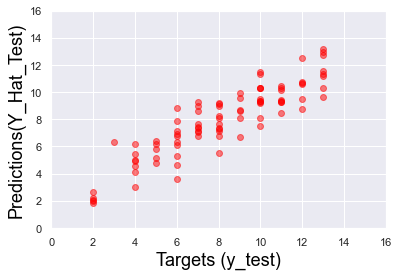

In [25]:
plt.scatter(y_test,Y_Hat_Test, alpha = 0.50, c ='red')
plt.xlabel('Targets (y_test)', size = 18, c = 'Black')
plt.ylabel('Predictions(Y_Hat_Test)', size = 18, c = 'Black')
plt.xlim(0,16)
plt.ylim(0,16)
plt.show()


In [26]:
#Data Frame performance (Predictions)

df_pf= pd.DataFrame(Y_Hat_Test, columns=['Prediction'])
df_pf.head()

,Prediction
0,5.265951
1,9.247002
2,9.371698
3,10.324352
4,12.521275


In [27]:
#Actual Values

y_test = y_test.reset_index(drop = True)
y_test.head()

0     6
1    11
2    10
3    10
4    12
Name: Wins, dtype: int64

In [28]:
#Table of Prediction vs Target (First 5 rows)

df_pf['Target'] = y_test
df_pf.head()


,Prediction,Target
0,5.265951,6
1,9.247002,11
2,9.371698,10
3,10.324352,10
4,12.521275,12


In [29]:
df_pf['Residual'] = df_pf["Target"] - df_pf['Prediction']

In [30]:
df_pf['Differences%'] = np.absolute(df_pf['Residual']/df_pf["Target"]*100)

In [31]:
df_pf.describe()

,Prediction,Target,Residual,Differences%
count,88.000000,88.000000,88.000000,88.000000
mean,7.933780,8.125000,0.191220,14.913767
std,2.607526,3.091748,1.366689,15.216216
min,1.859492,2.000000,-3.354180,0.513094
25%,6.355957,6.000000,-0.700371,5.110187
50%,8.170317,8.000000,0.043618,11.448600
75%,9.539187,10.250000,1.025256,21.101217
max,13.177692,13.000000,3.368203,111.806003


In [32]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x:'%.2f'%x)
df_pf.sort_values(by=["Differences%"])

,Prediction,Target,Residual,Differences%
52,12.93,13,0.07,0.51
83,1.98,2,0.02,1.03
22,8.10,8,-0.10,1.24
26,13.18,13,-0.18,1.37
77,7.10,7,-0.10,1.41
18,6.09,6,-0.09,1.52
80,2.04,2,-0.04,1.76
23,7.15,7,-0.15,2.14
15,12.72,13,0.28,2.18
54,10.27,10,-0.27,2.67


# Dropping Columns to Improve The Model

In [34]:
# Drop the features with P-Value higher than 0.05
# Passing Attempts Per Game
# Opponent Yards Per Rush Attempt


In [35]:
NFL_Optimized = NFL_New.drop(['Passing Attempts Per Game','Opponent Yards Per Rush Attempt'], axis = 1)
NFL_Optimized.head()

,Wins,Offensive Yards Per Play,Opponents Yards Per Play,1st Downs Per Game,1st Downs Per Play,3rd Down Conversion Rate,Opponent 3rd Down Conversion Rate,Opponent Completion Percentage,Pass Yards Per Game,Rush Yards Per Game,...,Rushing Attempts Per Game,Scoring Margin,Opponent Plays Per Game,Opponent Yards Per Pass Attempt,Sack Percentage,Time of Possession Percentage,Opponents First Downs Per Game,Interceptions Thrown Per Game,Opponent Passing TD Per Game,Passing TD Per Game
0,8,5.70,5.30,23.80,0.35,0.40,0.40,0.64,244.80,139.80,...,29.90,2.70,65.90,6.40,0.08,0.48,22.70,0.80,1.60,1.70
1,4,5.50,6.20,22.90,0.34,0.44,0.41,0.68,272.70,95.80,...,25.60,-1.10,64.60,7.50,0.04,0.51,22.90,0.70,2.10,1.70
2,11,5.80,5.10,20.40,0.33,0.49,0.34,0.64,171.90,192.10,...,34.60,8.80,62.30,5.90,0.06,0.53,20.90,0.70,1.30,1.50
3,13,6.00,5.60,24.20,0.38,0.47,0.42,0.64,281.20,104.20,...,24.50,6.80,65.20,6.60,0.06,0.52,22.40,0.60,1.50,2.40
4,5,5.60,5.60,20.90,0.34,0.39,0.49,0.68,243.00,106.50,...,25.40,-3.20,63.90,6.50,0.05,0.52,22.50,1.00,1.80,1.00


# Optimized Independent and Dependent Variables

In [41]:
Y = NFL_Optimized["Wins"]
X_Op = NFL_Optimized.drop(["Wins"],axis = 1)

# Scale the Data

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_Op)

StandardScaler()

In [43]:
X_scaled_Op = scaler.transform(X_Op)

# Test Train Split

In [45]:
from sklearn.model_selection import train_test_split

x_train_Op,x_test_Op,y_train_Op,y_test_Op = train_test_split(X_scaled_Op,Y, test_size = 0.25, random_state = 360)

# Create New Linear Regression

In [47]:
LR_Op = LinearRegression()
LR_Op.fit(x_train_Op,y_train_Op)

LinearRegression()

In [48]:
#The predictions of the linear model is always in Y_Hat

Y_Hat_Op = LR.predict(x_train_Op)

# Scatter Plot

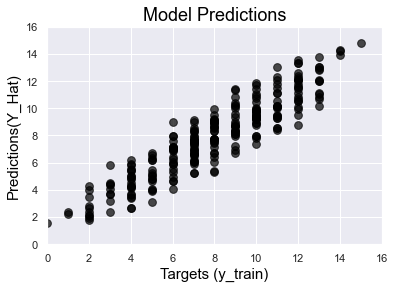

In [50]:
#For Alpha in the top line of code
#The more saturated the color, the higher the concentration


#We can see this scatter plot is slightly better than the previous model plot

plt.scatter(y_train_Op,Y_Hat_Op, alpha = 0.7, c='black', s =60)
plt.xlabel('Targets (y_train)', size = 15, c = 'Black')
plt.ylabel('Predictions(Y_Hat)', size = 15, c = 'Black')
plt.xlim(0,16)
plt.ylim(0,16)
plt.title('Model Predictions', size=18, c='Black')
plt.show()

# Optimized R Squared

In [52]:
#The model explains 84.8% of the variability of the data 

LR_Op.score(x_train_Op,y_train_Op)

0.8486721739804418

In [53]:
# Let's use the handy function we created
def adjusted_R(x,y):
    r2 = LR_Op.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [54]:
adjusted_R(x_train_Op,y_train_Op)

0.832070809100659

# Weights and Bias

In [55]:
#B0

LR_Op.intercept_

7.964968512863907

In [56]:
#Weights (B1,B2,etc..)

LR_Op.coef_

array([ 0.95306594,  0.13165729, -0.02899259, -0.39092596,  0.05393263,
       -0.09969408, -0.24342424, -1.27337078, -1.02784191,  0.29601024,
        0.37709157, -0.13599616,  0.26074173,  0.0949167 , -0.21124   ,
       -0.28659828,  0.28225853,  2.62527488, -0.00768348,  0.106774  ,
        0.00920324,  0.1140229 ,  0.01440875,  0.01353271,  0.05082764,
        0.20701643])

# P-Value

In [58]:
from sklearn.feature_selection import f_regression

In [59]:
f_regression(x_train_Op,y_train_Op)

(array([  66.89536286,   28.73043783,   65.52304945,   68.21075462,
          71.40726506,   29.12375268,   42.67057302,   27.30044957,
          19.5202201 ,   20.61572103,   34.86819788,    4.50918427,
         206.33196138,   13.36200438,    1.83512093,    3.3172369 ,
          45.20014984, 1178.25485336,    8.16749238,   69.82018834,
          15.94530039,   76.33900333,   25.29523629,   67.68151327,
          46.73305898,   93.98833014]),
 array([1.24419402e-14, 1.82502813e-07, 2.16888095e-14, 7.32080400e-15,
        2.03651183e-15, 1.52009311e-07, 3.35214607e-10, 3.55740096e-07,
        1.45809454e-05, 8.56582667e-06, 1.09013229e-08, 3.46506275e-02,
        6.65619167e-35, 3.10214707e-04, 1.76690884e-01, 6.96973289e-02,
        1.10844359e-10, 5.99134993e-99, 4.60729564e-03, 3.83767508e-15,
        8.47371594e-05, 2.90102684e-16, 9.13759896e-07, 9.05967770e-15,
        5.69707083e-11, 3.43929050e-19]))

In [61]:
p_values_Op = f_regression(x_train_Op,y_train_Op)[1]
p_values_Op

array([1.24419402e-14, 1.82502813e-07, 2.16888095e-14, 7.32080400e-15,
       2.03651183e-15, 1.52009311e-07, 3.35214607e-10, 3.55740096e-07,
       1.45809454e-05, 8.56582667e-06, 1.09013229e-08, 3.46506275e-02,
       6.65619167e-35, 3.10214707e-04, 1.76690884e-01, 6.96973289e-02,
       1.10844359e-10, 5.99134993e-99, 4.60729564e-03, 3.83767508e-15,
       8.47371594e-05, 2.90102684e-16, 9.13759896e-07, 9.05967770e-15,
       5.69707083e-11, 3.43929050e-19])

In [62]:
p_values_Op.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.035, 0.   , 0.   , 0.177, 0.07 , 0.   , 0.   ,
       0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [64]:
#In this optimized model we only have One (1) feature that has a P-Value greater than 0.05


Optimized_Reg_summary = pd.DataFrame(data = X_Op.columns.values, columns=['Features'])
Optimized_Reg_summary ['Coefficients'] = LR_Op.coef_
Optimized_Reg_summary ['p-values'] = p_values_Op.round(4)
Optimized_Reg_summary

,Features,Coefficients,p-values
0,Offensive Yards Per Play,0.95,0.00
1,Opponents Yards Per Play,0.13,0.00
2,1st Downs Per Game,-0.03,0.00
3,1st Downs Per Play,-0.39,0.00
4,3rd Down Conversion Rate,0.05,0.00
5,Opponent 3rd Down Conversion Rate,-0.10,0.00
6,Opponent Completion Percentage,-0.24,0.00
7,Pass Yards Per Game,-1.27,0.00
8,Rush Yards Per Game,-1.03,0.00
9,Passing First Downs Per Game,0.30,0.00


# Testing The New Model

In [66]:
Optimized_Y_Hat_Test = LR_Op.predict(x_test_Op)

In [83]:
#Data Frame performance (Predictions)

Optimized_DF = pd.DataFrame(Optimized_Y_Hat_Test, columns=['Prediction'])
Optimized_DF.head()

,Prediction
0,6.60
1,3.18
2,7.15
3,4.92
4,10.79


In [84]:
#Actual Values

Optimized_y_test = y_test.reset_index(drop = True)
Optimized_y_test.head()

0     7
1     5
2     6
3     5
4    10
Name: Wins, dtype: int64

In [87]:
#Table of Prediction vs Target

Optimized_DF['Target'] = Optimized_y_test
Optimized_DF.head()


,Prediction,Target
0,6.60,7
1,3.18,5
2,7.15,6
3,4.92,5
4,10.79,10


In [88]:
Optimized_DF['Residual'] = Optimized_DF["Target"] - Optimized_DF['Prediction']

In [89]:
Optimized_DF['Differences%'] = np.absolute(Optimized_DF['Residual']/Optimized_DF["Target"]*100)

In [90]:
Optimized_DF.describe()

,Prediction,Target,Residual,Differences%
count,88.00,88.00,88.00,88.00
mean,8.02,8.06,0.04,17.00
std,2.96,3.17,1.48,15.59
min,2.43,2.00,-3.74,0.23
25%,5.94,5.75,-1.01,6.63
50%,7.58,7.00,0.09,12.06
75%,10.76,11.00,1.00,22.24
max,13.89,15.00,4.56,93.52


In [91]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x:'%.2f'%x)
Optimized_DF.sort_values(by=["Differences%"])

,Prediction,Target,Residual,Differences%
64,9.98,10,0.02,0.23
65,5.96,6,0.04,0.74
46,11.89,12,0.11,0.89
43,8.08,8,-0.08,0.99
86,12.17,12,-0.17,1.46
17,12.79,13,0.21,1.60
27,8.85,9,0.15,1.64
3,4.92,5,0.08,1.65
19,5.88,6,0.12,2.01
29,13.27,13,-0.27,2.08
